# <p style="color:#1f77b4"> Desafío 1</p>

Se espera que muestren conocimiento en las siguientes areas:

- Realizar consultas a una base de datos publica alojada en Google Could Plataform
- Trabajar con bases de datos relacionales
- Procesamiento de datos
- Visualización de datos
- Versionado de software

Usando el dataset `nhtsa_traffic_fatalities` desde el proyecto `bigquery-public-data`, y usando la tabla de datos del año 2015. Se pide realizar lo siguiente:

1. Crear y completar un diccionario de datos de la tabla, guardarlo en un archivo de texto separado por comas `.csv` 

Lo siguiente se debe realizar en un jupyter notebook:

2. Identificar, usando consultas y con gráficas las siguientes características del dataset: 
   1. Mayor numero de accidentes por estado (`state_name`).
   2. Mayor numero de accidentes por uso de tierra (`land_use`).
   3. Mayor numero de accidentes por empresa de carreteras (`ownership_name`).
   4. Mayor numero de accidentes por carretera (`trafficway_identifier`).
3. Realizar un análisis mensual de accidentes por estado. 
4. Realizar un análisis según la hora del dia. 
   - Ahondar para los estados con mayor cantidad de muertes
5. Finalmente realizar un análisis resaltando la razón entre números de accidentes y conductores ebrios. 

Los resultados deben ser entregados como un repositorio en [github](https://github.com), con una rama de desarrollo  y una de producción, además el repositorio deberá contar con un archivo de requerimientos (requirements.txt) donde se listen las librerías de python relevantes para el desarrollo del análisis y un readme donde se presenten los resultados obtenidos indicando y argumentando todos los descubrimientos que realicen del dataset. 

Para realizar el trabajo en github, les recomiendo la siguiente [guía](https://david-estevez.gitbooks.io/the-git-the-bad-and-the-ugly/content/es/buenas-practicas-al-trabajar-con-git.html), si van a trabajar en grupos, ademas de especificarlo en el readme, cada integrante debe tener su rama de desarrollo y hacer los correspondiente fork y pull request.


## Load basic packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import bigquery

## Plot parameters
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.rcParams['legend.edgecolor'] = '0.0'
plt.rcParams.update({'figure.autolayout': False})

## 1. Load SQL data into a DataFrame

In [2]:
client = bigquery.Client(project='bigquery-public-data-dataphy')

query="""
SELECT *
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
"""

query_job = client.query(query)
results = query_job.result()
df = results.to_dataframe()
df.to_csv('nhtsa_traffic_fatalities-accident_2015') #diccionario de datos de la tabla???

## 2. Identificar, usando consultas y con gráficas las siguientes características del dataset: 

### 1. Mayor numero de accidentes por estado (`state_name`).


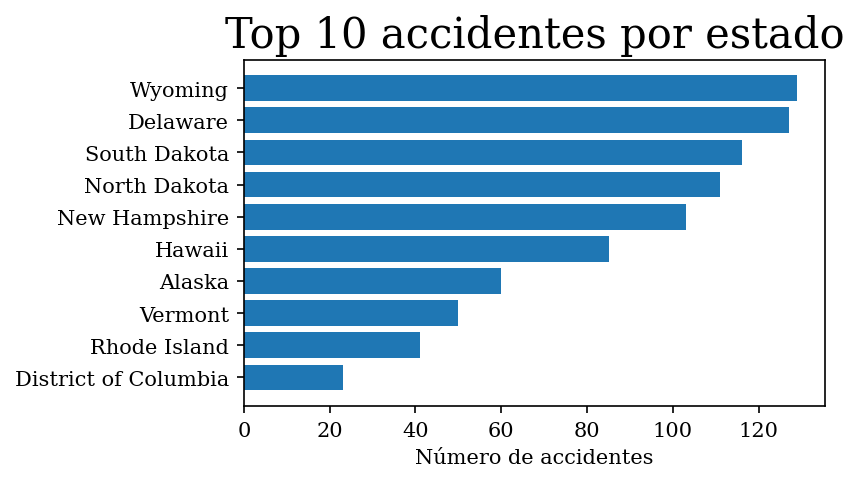

In [3]:
query="""
SELECT state_name, COUNT(*) AS count
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY state_name
ORDER BY count
LIMIT 10
"""

query_job = client.query(query)
results = query_job.result()
df = results.to_dataframe()

fig, ax = plt.subplots(figsize=(5, 3))
ax.barh(y=df['state_name'], width = df['count'] )
ax.set_xlabel("Número de accidentes")
ax.set_title("Top 10 accidentes por estado", fontsize=20)


top_10_states = df['state_name'].tolist()

###    2. Mayor numero de accidentes por uso de tierra (`land_use`).


Text(0.5, 1.0, 'Número de accidentes por zona')

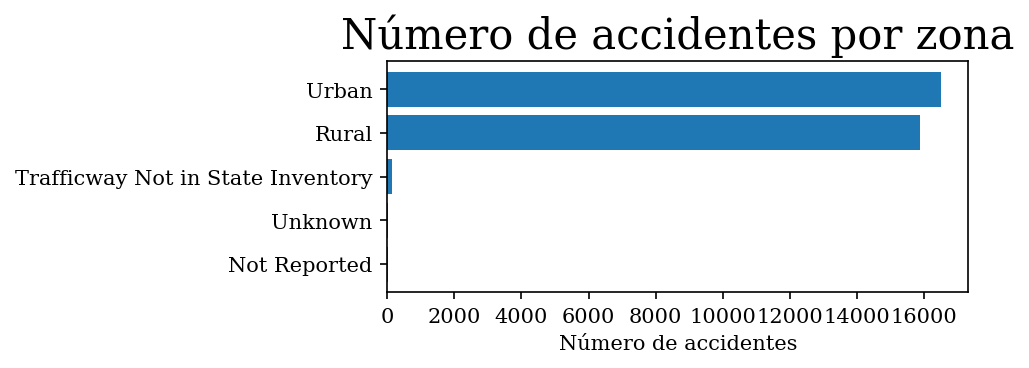

In [4]:
query="""
SELECT land_use_name, COUNT(*) AS count
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY land_use_name
ORDER BY count
"""

query_job = client.query(query)
results = query_job.result()
df = results.to_dataframe()

fig, ax = plt.subplots(figsize=(5,2))
ax.barh(y=df['land_use_name'], width = df['count'] )
ax.set_xlabel("Número de accidentes")
ax.set_title("Número de accidentes por zona", fontsize=20)

###    3. Mayor numero de accidentes por empresa de carreteras (`ownership_name`).

Text(0.5, 1.0, 'Top 10 de accidentes por servicio')

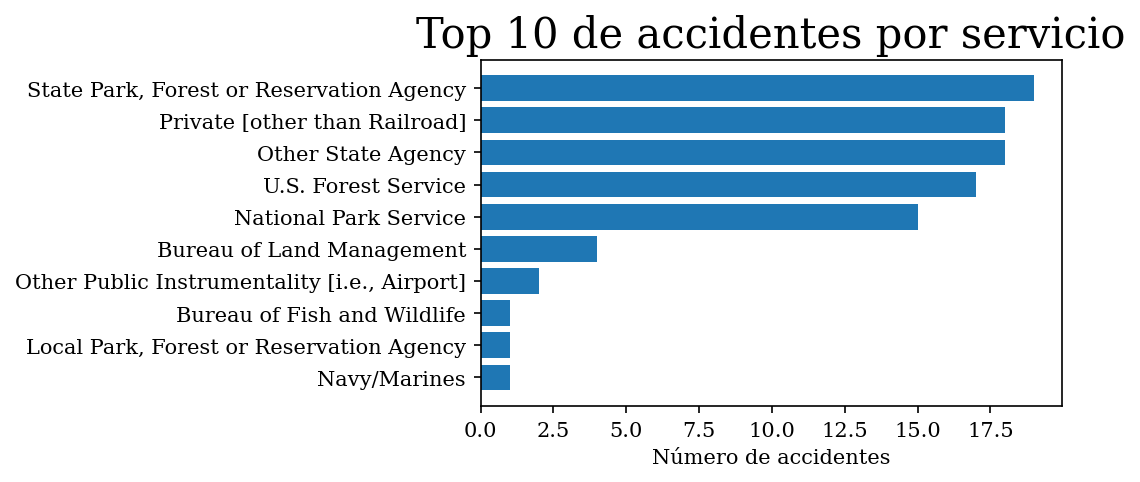

In [5]:
query="""
SELECT ownership_name, COUNT(*) AS count
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY ownership_name
ORDER BY count
LIMIT 10
"""

query_job = client.query(query)
results = query_job.result()
df = results.to_dataframe()

fig, ax = plt.subplots(figsize=(5,3))
ax.barh(y=df['ownership_name'], width = df['count'] )
ax.set_xlabel("Número de accidentes")
ax.set_title("Top 10 de accidentes por servicio", fontsize=20)

### 4. Mayor numero de accidentes por carretera (`trafficway_identifier`).

In [6]:
query="""
SELECT trafficway_identifier, COUNT(*) AS count
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY trafficway_identifier
ORDER BY count
"""

query_job = client.query(query)
results = query_job.result()
df = results.to_dataframe()

Text(0.5, 1.0, 'carretera con mayor número de accidentes')

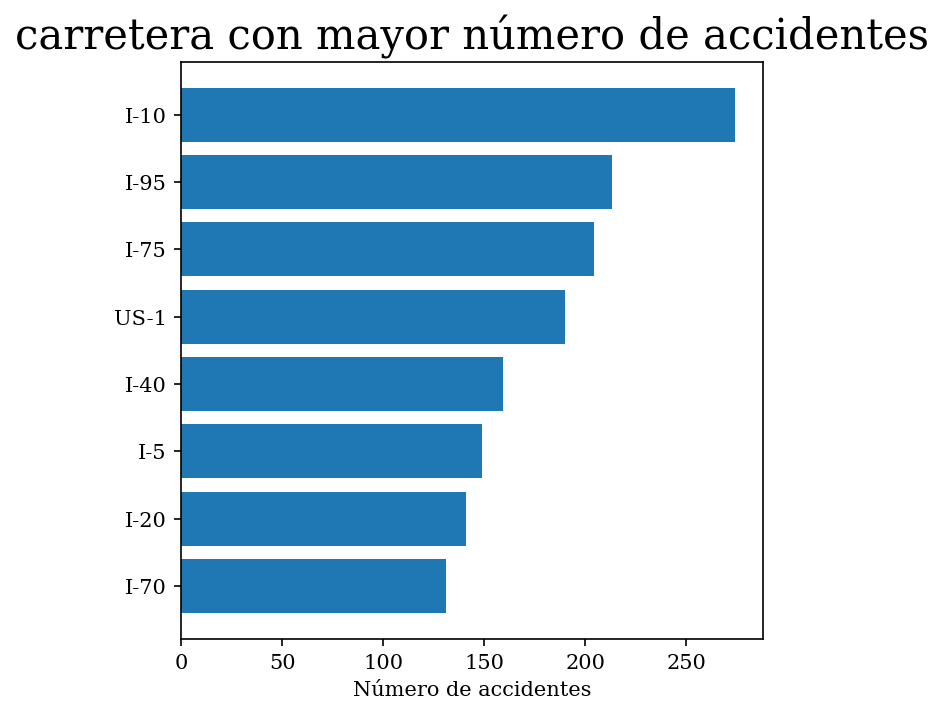

In [7]:
fig, ax = plt.subplots(figsize=(5,5))

percentiles = np.percentile(df['count'], 99.95)

ax.barh(y=df['trafficway_identifier'][df['count'] > percentiles], width = df['count'][df['count'] > percentiles] )
ax.set_xlabel("Número de accidentes")
ax.set_title("carretera con mayor número de accidentes", fontsize=20)

## 3. Realizar un análisis mensual de accidentes por estado. 


In [8]:
query="""
SELECT
  state_name,
  EXTRACT(MONTH FROM timestamp_of_crash) AS month,
  COUNT(*) AS accident_count
FROM
  `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY
  state_name, month
ORDER BY
  state_name, month;
"""

query_job = client.query(query)
results = query_job.result()
df = results.to_dataframe()

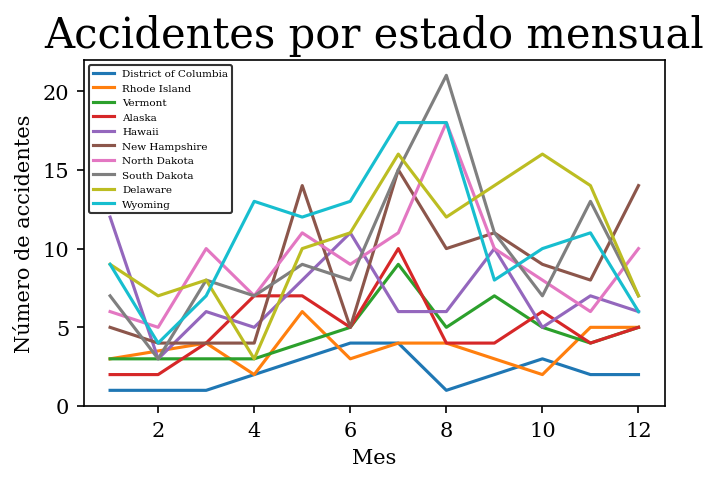

In [9]:
fig, ax = plt.subplots(figsize=(5,3))
for state in top_10_states:
    ax.plot(df['month'][df['state_name'] == state], df['accident_count'][df['state_name'] == state],label= state)
    ax.set_xlabel("Mes")
    ax.set_ylabel("Número de accidentes")
    ax.set_title("Accidentes por estado mensual", fontsize=20)
ax.legend(fontsize=5)

## 4. Realizar un análisis según la hora del dia. 
   - Ahondar para los estados con mayor cantidad de muertes


In [10]:
query="""
SELECT
  state_name,
  EXTRACT(HOUR FROM timestamp_of_crash) AS hours,
  COUNT(*) AS fatalities
FROM
  `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`

WHERE
  number_of_fatalities > 0
GROUP BY
  state_name, hours
ORDER BY
  state_name, hours
"""

query_job = client.query(query)
results = query_job.result()
df = results.to_dataframe()

Text(0.5, 1.0, 'Número de accidentes fatales, por estado')

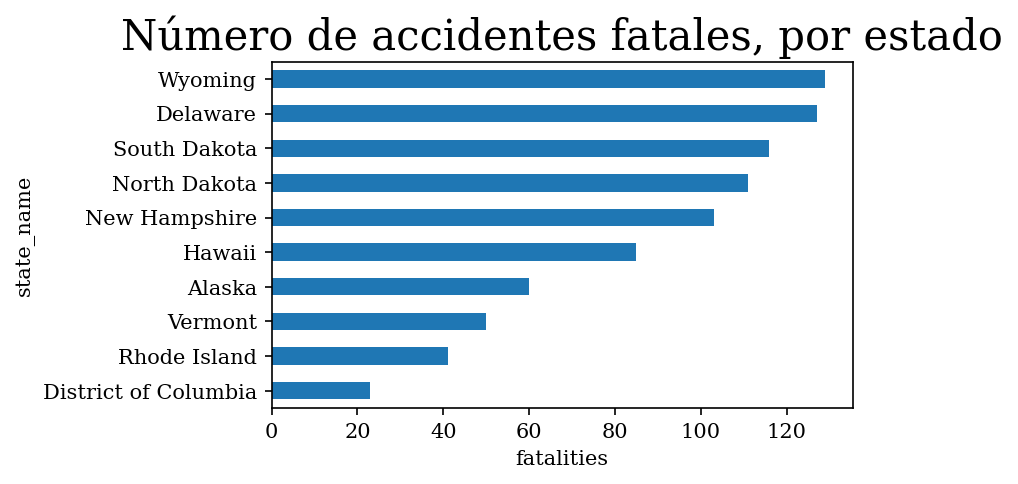

In [11]:
fig, ax = plt.subplots(figsize=(5,3))
df.groupby("state_name")["fatalities"].sum().sort_values().head(10).plot(kind="barh",ax=ax)

ax.set_xlabel("fatalities")
ax.set_title("Número de accidentes fatales, por estado", fontsize=20)

In [12]:
df.groupby("state_name")["fatalities"].sum().describe()

count          51.0
mean          638.0
std      691.117646
min            23.0
25%           211.0
50%           491.0
75%           807.0
max          3190.0
Name: fatalities, dtype: Float64

In [13]:
top_states = df.groupby("state_name")["fatalities"].sum()>900

filtered_states = df.loc[df["state_name"].isin(top_states[top_states].index)]

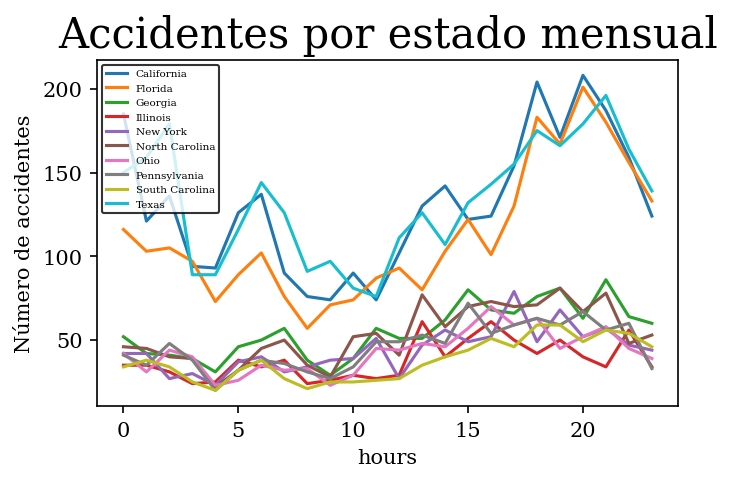

In [14]:

fig, ax = plt.subplots(figsize=(5,3))
for state in filtered_states['state_name'].unique():
    ax.plot(filtered_states['hours'][filtered_states['state_name'] == state].values, filtered_states['fatalities'][filtered_states['state_name'] == state].values ,label= state)
    ax.set_xlabel("hours")
    ax.set_ylabel("Número de accidentes")
    ax.set_title("Accidentes por estado mensual", fontsize=20)
ax.legend(fontsize=5, loc='upper left')

## 5. Finalmente realizar un análisis resaltando la razón entre números de accidentes y conductores ebrios. 

In [15]:
query="""
SELECT 
    state_name, 
    COUNT(consecutive_number) AS drunk_accidents
FROM 
    `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
WHERE 
    number_of_drunk_drivers > 0
GROUP BY 
    state_name
ORDER BY 
    state_name, drunk_accidents DESC 

"""

query_job = client.query(query)
results = query_job.result()
df_drunks = results.to_dataframe()

query="""
SELECT 
    state_name, 
    COUNT(consecutive_number) AS all_accidents
FROM 
    `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY
    state_name
ORDER BY 
    state_name
"""

query_job = client.query(query)
results = query_job.result()
df_accidents= results.to_dataframe()

Text(0.5, 1.0, 'Accidentes provocados por alcohol, por estado')

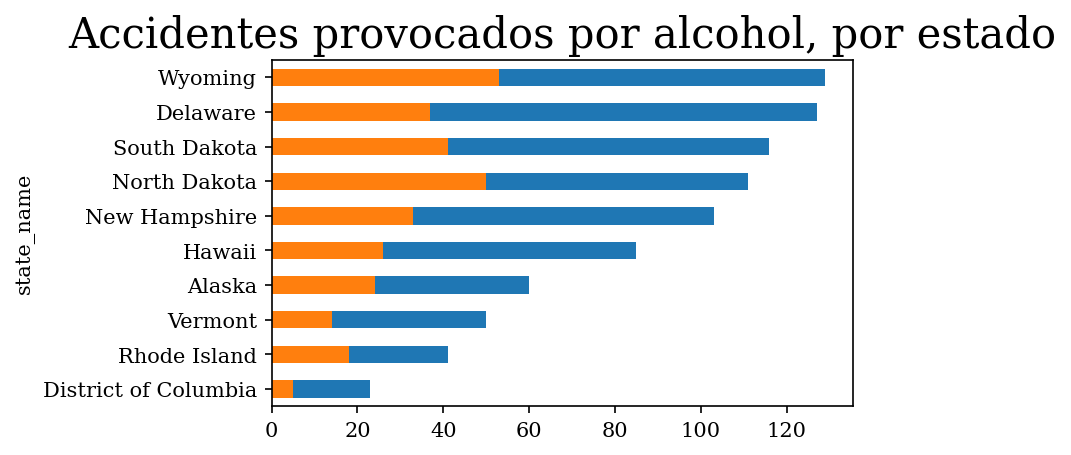

In [16]:
combined_df = pd.merge(df_accidents.sort_values(by="all_accidents", ascending=True).head(10), df_drunks, on="state_name", how="inner")

fig, ax = plt.subplots(figsize=(5,3))
combined_df.set_index("state_name")["all_accidents"].plot(kind="barh",ax=ax,color = "C0")
combined_df.set_index("state_name")["drunk_accidents"].plot(kind="barh",ax=ax,color = "C1")
ax.set_title("Accidentes provocados por alcohol, por estado", fontsize=20)

In [17]:
combined_df.set_index("state_name")['drunk_accidents']/combined_df.set_index("state_name")['all_accidents']

state_name
District of Columbia    0.217391
Rhode Island            0.439024
Vermont                     0.28
Alaska                       0.4
Hawaii                  0.305882
New Hampshire           0.320388
North Dakota             0.45045
South Dakota            0.353448
Delaware                0.291339
Wyoming                 0.410853
dtype: Float64

Text(0.5, 0, 'fatalities rate')

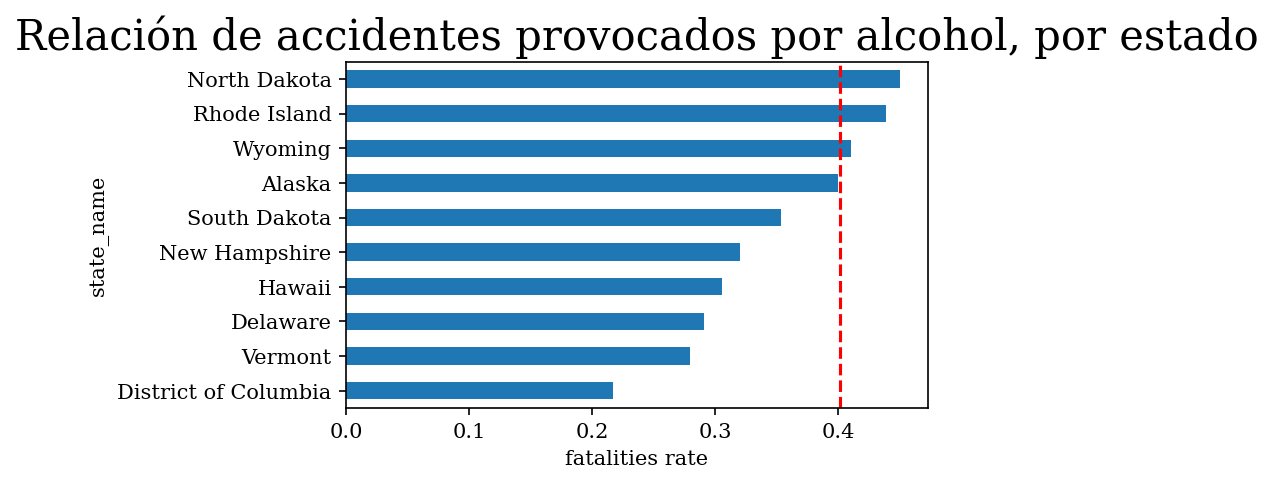

In [18]:
fig, ax = plt.subplots(figsize=(5,3))
(combined_df.set_index("state_name")['drunk_accidents']/combined_df.set_index("state_name")['all_accidents']).sort_values().plot(kind='barh', ax=ax)

percentiles = np.percentile(combined_df.set_index("state_name")['drunk_accidents']/combined_df.set_index("state_name")['all_accidents'], 68.2)

ax.axvline(percentiles, color='red', linestyle='--')
ax.set_title("Relación de accidentes provocados por alcohol, por estado", fontsize=20)
ax.set_xlabel("fatalities rate")